In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

train_data.shape

Using TensorFlow backend.


(25000,)

To decode review back to english lang:

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(len(train_data), len(train_data[0]), len(train_data[1]))

25000 218 189


In [3]:
decoded_reviews = ' '.join([reverse_word_index.get(i-3, '\n')for i in train_data[0]])
decoded_reviews

"\n this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert \n is an amazing actor and now the same being director \n father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for \n and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also \n to the two little boy's that played the \n of norman and paul they were just brilliant children are often left out of the \n list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        #print(results)
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.001))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs = 4, batch_size = 100, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 9s 595us/step - loss: 0.4035 - acc: 0.8390 - val_loss: 0.2789 - val_acc: 0.8875
Epoch 2/4
15000/15000 [==============================] - 5s 360us/step - loss: 0.1886 - acc: 0.9322 - val_loss: 0.2949 - val_acc: 0.8817
Epoch 3/4
15000/15000 [==============================] - 5s 351us/step - loss: 0.1189 - acc: 0.9585 - val_loss: 0.3458 - val_acc: 0.8797
Epoch 4/4
15000/15000 [==============================] - 5s 350us/step - loss: 0.0782 - acc: 0.9756 - val_loss: 0.3919 - val_acc: 0.8727


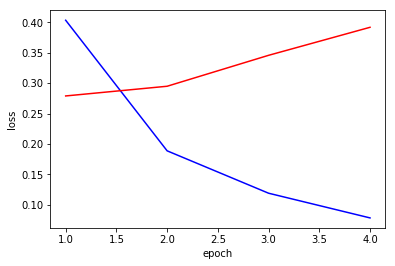

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 5)

plt.plot(epochs, loss_values, 'b', label = 'Training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.show();

In [26]:
y_pred = model.predict(x_test)
y_pred

array([[0.04405046],
       [0.99999106],
       [0.8243673 ],
       ...,
       [0.01360385],
       [0.03034868],
       [0.74496716]], dtype=float32)